In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:

# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement

Station = Base.classes.station


In [8]:
# Create our session (link) from Python to the DB
session = Session(bind=engine)


# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
recent_date.date


'2017-08-23'

2016-08-23 00:00:00


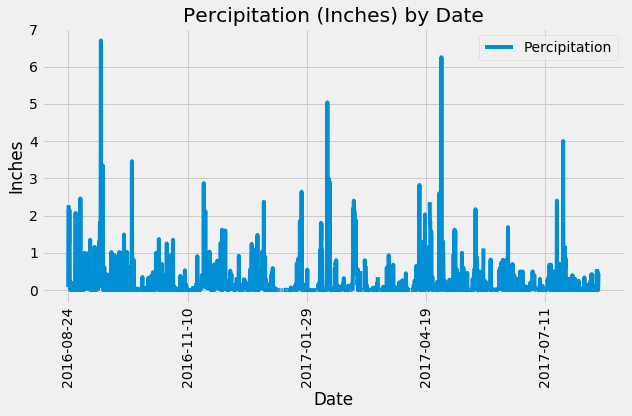

In [17]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 


# Calculate the date one year from the last date in data set.
year_ago = dt.datetime(2017,8,23) - dt.timedelta(days = 365)
print(year_ago)

# Perform a query to retrieve the data and precipitation scores
results = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= year_ago).\
    order_by(Measurement.date).all()

dates = [result[0] for result in results]
prcps = [result[1] for result in results]


# Save the query results as a Pandas DataFrame and set the index to the date column
data={'Date': dates,
     'Percipitation': prcps}
df = pd.DataFrame(data)
df = df.set_index('Date')

# Sort the dataframe by date
df = df.sort_index()

# Use Pandas Plotting with Matplotlib to plot the data
ax = df.plot(figsize=(9, 6))
ax.set_xlabel("Date")
ax.set_ylabel("Inches")
ax.set_title('Percipitation (Inches) by Date')
plt.xticks(rotation='vertical')
plt.tight_layout()
plt.show()

In [11]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,Percipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number stations in the dataset
num_of_stations = session.query(Station).count()

print(f'Number of Sations: {num_of_stations}')


Number of Sations: 9


In [13]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
observation_counts = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()

most_active_station = observation_counts[0][0]

print('Observation count for each stations')
for o in observation_counts:
    print(o)
print()

print(f'Station with Highest number of observations: {most_active_station}')


Observation count for each stations
('USC00519281', 2772)
('USC00519397', 2724)
('USC00513117', 2709)
('USC00519523', 2669)
('USC00516128', 2612)
('USC00514830', 2202)
('USC00511918', 1979)
('USC00517948', 1372)
('USC00518838', 511)

Station with Highest number of observations: USC00519281


In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
min = session.\
    query(func.min(Measurement.tobs)).\
    filter(Measurement.station == most_active_station).first()
max = session.\
    query(func.max(Measurement.tobs)).\
    filter(Measurement.station == most_active_station).first()
avg = session.\
    query(func.avg(Measurement.tobs)).\
    filter(Measurement.station == most_active_station).first()


temp_min = min[0]
temp_max = max[0]
temp_avg = avg[0]

print(f'Minimum Temperature: {temp_min}')
print(f'Maximum Temperature: {temp_max}')
print(f'Temperature average: {temp_avg}')


Minimum Temperature: 54.0
Maximum Temperature: 85.0
Temperature average: 71.66378066378067


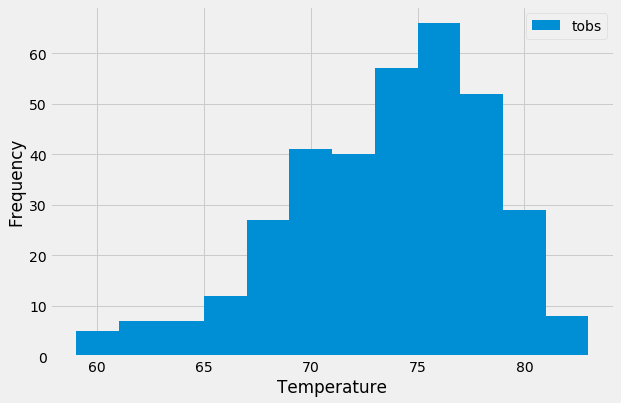

,tobs
Date,
2016-08-24,77.0
2016-08-25,80.0
2016-08-26,80.0
2016-08-27,75.0
2016-08-28,73.0
...,...
2017-08-14,77.0
2017-08-15,77.0
2017-08-16,76.0


In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
results = session.query(Measurement.date, Measurement.tobs).\
    filter(Measurement.date >= year_ago).\
    filter(Measurement.station == most_active_station).\
    order_by(Measurement.date).all()

dates = [result[0] for result in results]
temps = [result[1] for result in results]

# Save the query results as a Pandas DataFrame and set the index to the date column
data={'Date': dates,
     'tobs': temps}
df = pd.DataFrame(data)
df = df.set_index('Date')

# Sort the dataframe by date
df = df.sort_index()
df.head()

# Use Pandas Plotting with Matplotlib to plot the data
ax = df.plot.hist(bins=12,figsize=(9, 6))
plt.xlabel('Temperature')
plt.show()
df

# Close session

In [16]:
# Close Session
session.close()